In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.nn import Parameter
import torch.optim as optim
import torch.nn.functional as F

import matplotlib.pyplot as plt
import pickle
import numpy as np
import sys
sys.path.append('..')
import math # to check nan
from tqdm import tqdm
from sklearn import metrics

In [2]:
def load_cml_ggn(data_path,batch_size = 128,node=10,seed=2050):

    with open(data_path, 'rb') as f:
        object_matrix, train_data, val_data, test_data = pickle.load(f) # (samples, nodes, timesteps, 1)
    
    print('\nMatrix dimension: %s \nTrain data size: %s \nVal data size: %s \nTest data size: %s'
          % (object_matrix.shape, train_data.shape, val_data.shape, test_data.shape))    

    train_loader = DataLoader(train_data[:], batch_size=batch_size, shuffle=False)#
    val_loader = DataLoader(val_data[:], batch_size=batch_size, shuffle=False) # 记得改回来
    test_loader = DataLoader(test_data[:], batch_size=batch_size, shuffle=False) # 记得改回来
    return train_loader,val_loader,test_loader,object_matrix

In [3]:
# load data
data_path = '../data/2000cmlkron-ws128-10000.pickle'
# a = torch.load(data_path,map_location=torch.device('cpu'))
train_loader, val_loader, test_loader, object_matrix = load_cml_ggn(data_path,batch_size=1024,node=128)


Matrix dimension: torch.Size([128, 128]) 
Train data size: torch.Size([10000, 128, 2, 1]) 
Val data size: torch.Size([2000, 128, 2, 1]) 
Test data size: torch.Size([2000, 128, 2, 1])


Text(0.5, 1.0, 'groundtruth adj')

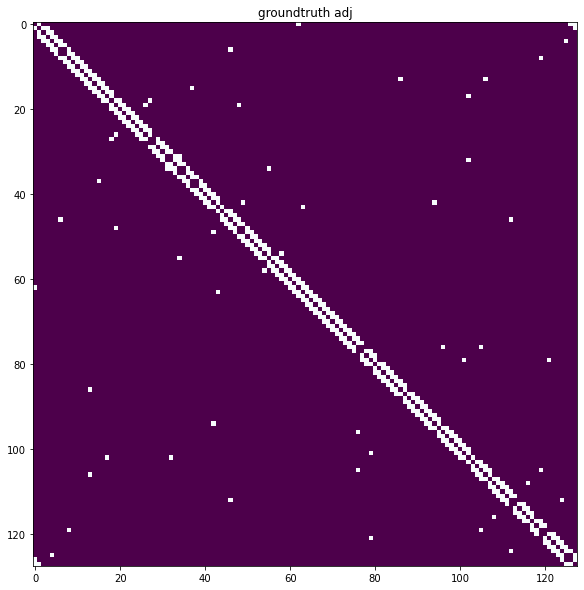

In [5]:
plt.figure(figsize=(10,10))
plt.imshow(object_matrix, cmap=plt.cm.BuPu_r)
plt.title('groundtruth adj')
# plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
# 向右，向上，宽度，高度，会互相影响
# cax = plt.axes([0.85, 0.12, 0.025, 0.775])
# plt.colorbar(cax=cax)

In [6]:
torch.sum(object_matrix)

tensor(512.)